In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

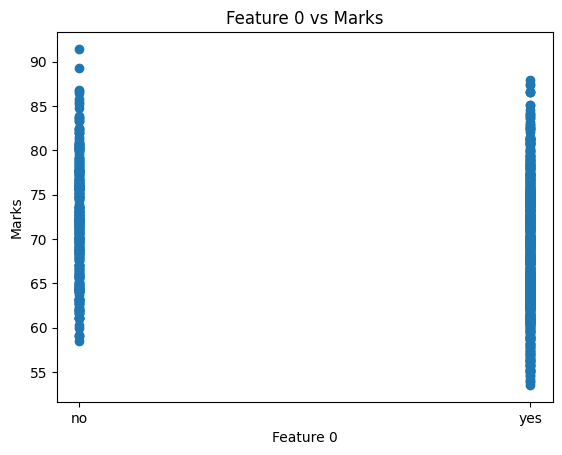

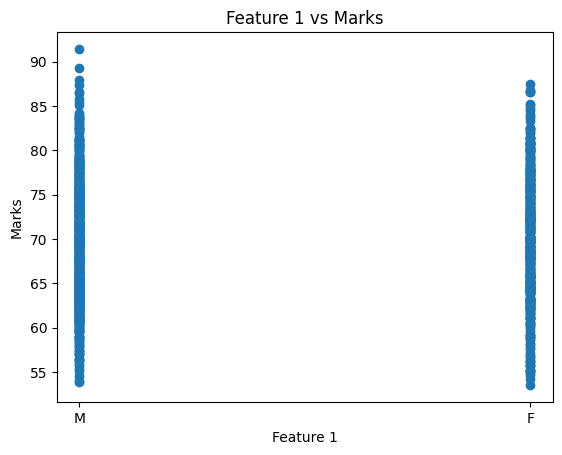

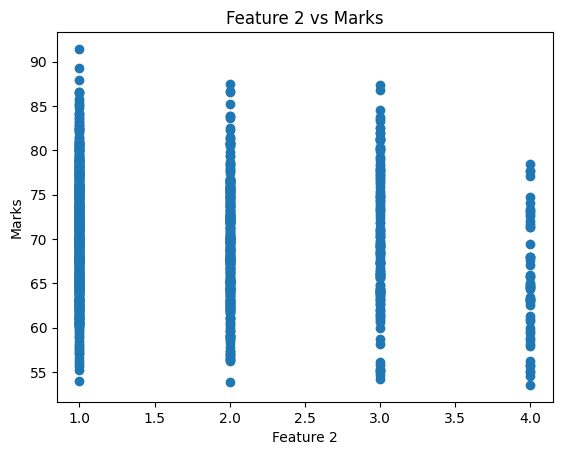

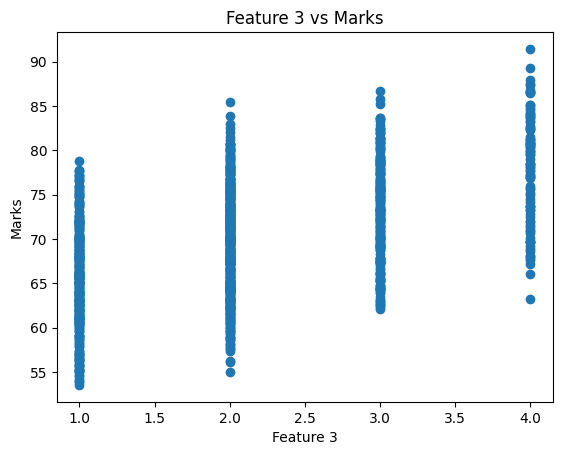

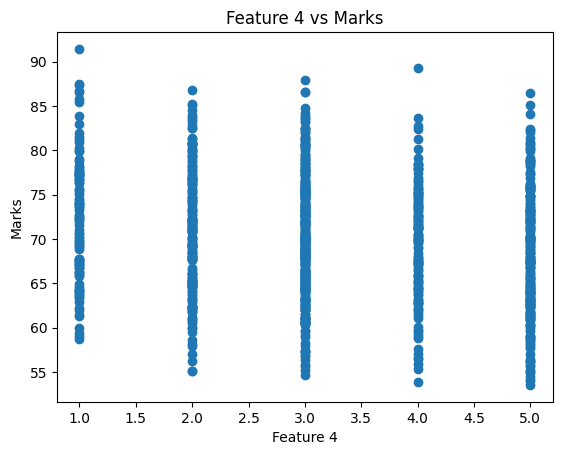

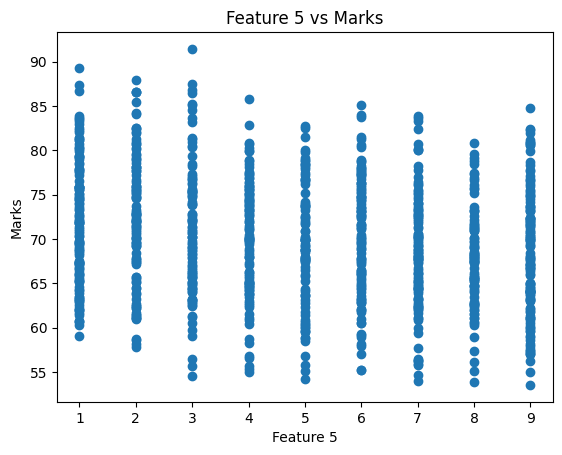

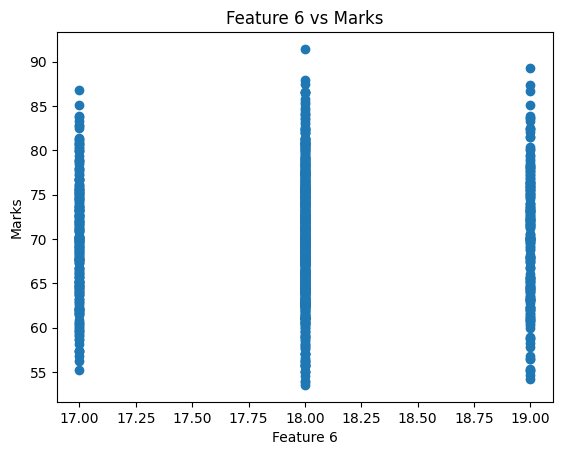

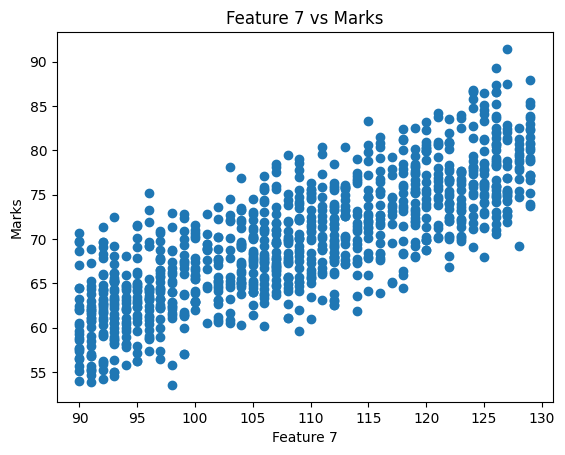

In [25]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('/content/Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
for i in range(x_train.shape[1]):
    plt.figure()
    plt.scatter(x_train[:, i], y_train)
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Marks')
    plt.title(f'Feature {i} vs Marks')
    plt.show()

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

from sklearn.preprocessing import LabelEncoder

def feature_changing(x_train):
    # Assuming the need for label encoding for categorical features
    # Let's check if there are categorical features and apply Label Encoding if needed
    label_encoders = {}
    for i in range(x_train.shape[1]):
        if isinstance(x_train[0, i], str):
            le = LabelEncoder()
            x_train[:, i] = le.fit_transform(x_train[:, i])
            label_encoders[i] = le
    return x_train, label_encoders

x_train, label_encoders = feature_changing(x_train)


In [26]:
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
    return x_train, x_std, x_mean

x_train = x_train.astype(np.float64)
x_train, x_std, x_mean = z_score(x_train)


In [27]:
def cost(x_train, y_train, w, b):
    m = x_train.shape[0]
    predictions = np.dot(x_train, w) + b
    loss = np.mean((predictions - y_train) ** 2)
    return loss


In [28]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01):
    m = x_train.shape[0]
    predictions = np.dot(x_train, w) + b
    dw = (1/m) * np.dot(x_train.T, (predictions - y_train))
    db = (1/m) * np.sum(predictions - y_train)
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

# Initialize weights and bias
np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1], 1)
b = np.random.randn(1)

# Training loop with gradient descent
old_cost = float('inf')
tolerance = 0.00001

while True:
    current_cost = cost(x_train, y_train, w, b)
    if abs(old_cost - current_cost) < tolerance:
        break
    old_cost = current_cost
    w, b = gradient_descent(x_train, y_train, w, b)


In [29]:
# Load test data
x_predict = pd.read_excel('Test data.xlsx').iloc[:, :8].to_numpy()
x_predict = feature_changing_test(x_predict, label_encoders)
x_predict = (x_predict - x_mean) / x_std
ans = pd.read_excel('Test data.xlsx').iloc[:, 8].to_numpy()

# Predict and evaluate
y_predict = np.dot(x_predict, w) + b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim] - ans[dim]) < 0.5:
        accuracy += 1
accuracy = round(accuracy * 100 / len(ans), 2)
ok = 'Congratulations' if accuracy > 95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
